<h1>Lab 6: Wavelets</h1>

# Initialization



In [1]:
import numpy as np
import scipy as sp
from scipy import signal
from scipy.io import wavfile
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Audio, display
from scipy.fft import fft, fftfreq
import pywt

# Exercise 1

## Import the data

This is the original file audio. **CAREFUL, AUTOPLAY IS ON**

In [21]:
Audio('/content/drive/MyDrive/10 - UB /30 - 2nd semester courses/10 - Applied Harmonic Analysis/Labs/Lab6/easy.wav', autoplay=True)

Reading the .wav file we can recover the discrete time signal sequence as well as the samplerate

In [22]:
samplerate, x_original = wavfile.read('/content/drive/MyDrive/10 - UB /30 - 2nd semester courses/10 - Applied Harmonic Analysis/Labs/Lab2/easy.wav')

n_samples = len(x_original)

print("x:", x_original[:5])
print("number of samples in x:", n_samples)
print("sample rate:", samplerate)

x: [0 0 0 0 0]
number of samples in x: 198450
sample rate: 44100


In [23]:
# Adjust the length of the audio data
length = len(x_original)
J = 5
new_length = int(np.ceil(length / (2 ** J))) * (2 ** J)
pad_length = new_length - length
x_padded = np.pad(x_original, (0, pad_length), mode='constant')

Normalizing the signal to have magnitude in the range of [0,1] is a common practice to work with it better. In particular, Octave and Matlab do so automatically and seeminglessly, and the provided noise function in the exercise works as intended with a normalized signal. For this reason in the following cell we do so

In [24]:
x_original = (x_original.astype(float) - x_original.min()) / (x_original.max().astype(float) - x_original.min())

<Figure size 640x480 with 0 Axes>

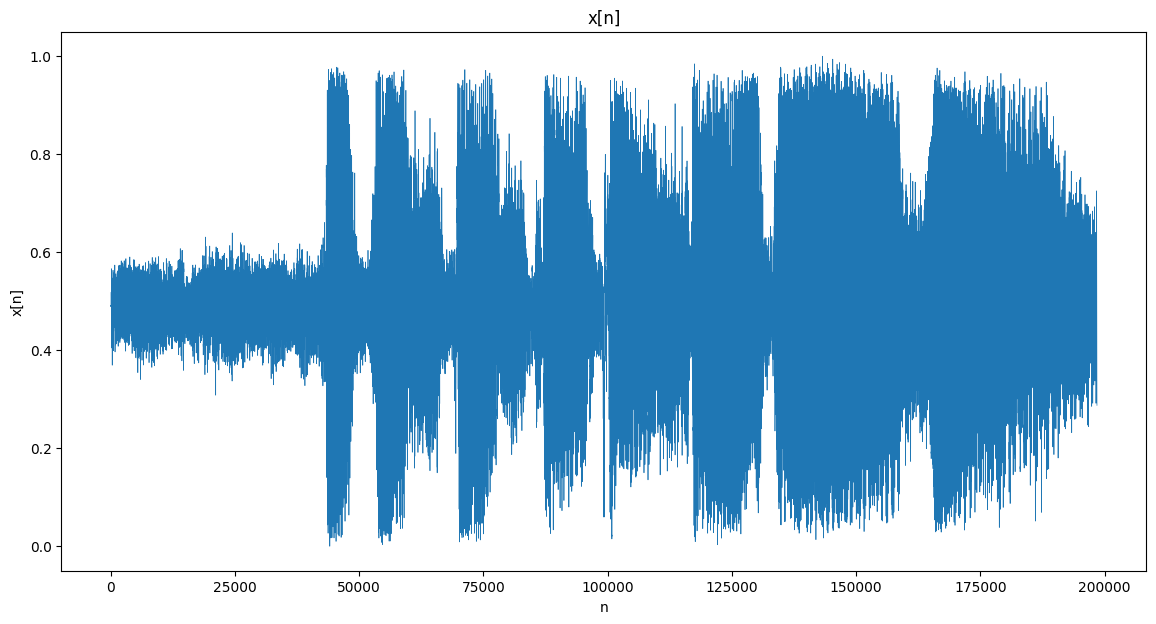

In [25]:
nn = np.linspace(0, n_samples-1, n_samples).astype(int)

plt.figure()
plt.figure(figsize=(14,7))
plt.title("x[n]")
plt.xlabel("n")
plt.ylabel("x[n]")
plt.plot(nn, x_original, linewidth=0.5)

## Add the padding to the signal 

This is necessary because the pywt.swt function requires an input that is a multiple of $2^{number \; of \; levels}$ where the number of levels will be defined later thorugh a variable J

Padding

In [26]:
new_length = int(np.ceil(length / (2 ** J))) * (2 ** J)
pad_length = new_length - length
x_padded = np.pad(x_original, (0, pad_length), mode='constant')

n_samples = len(x_padded)

print("x_padded:", x_padded[:5])
print("number of samples in x_padded:", n_samples)
print("sample rate:", samplerate)

x_padded: [0.48998397 0.48998397 0.48998397 0.48998397 0.48998397]
number of samples in x_padded: 198464
sample rate: 44100


## Add the noise to the signal

Now we can add the noise to the original file audio

In [27]:
t = np.arange(n_samples+1)[1:]/samplerate;
x = x_padded + np.random.normal(0, 0.2, len(x_padded)) 

n_samples = len(x)

print("x:", x[:5])
print("number of samples in x:", n_samples)
print("sample rate:", samplerate)

x: [0.44262371 0.35539318 0.57129796 0.65257587 0.38131378]
number of samples in x: 198464
sample rate: 44100


We can visualize the signal with the noise x[n]



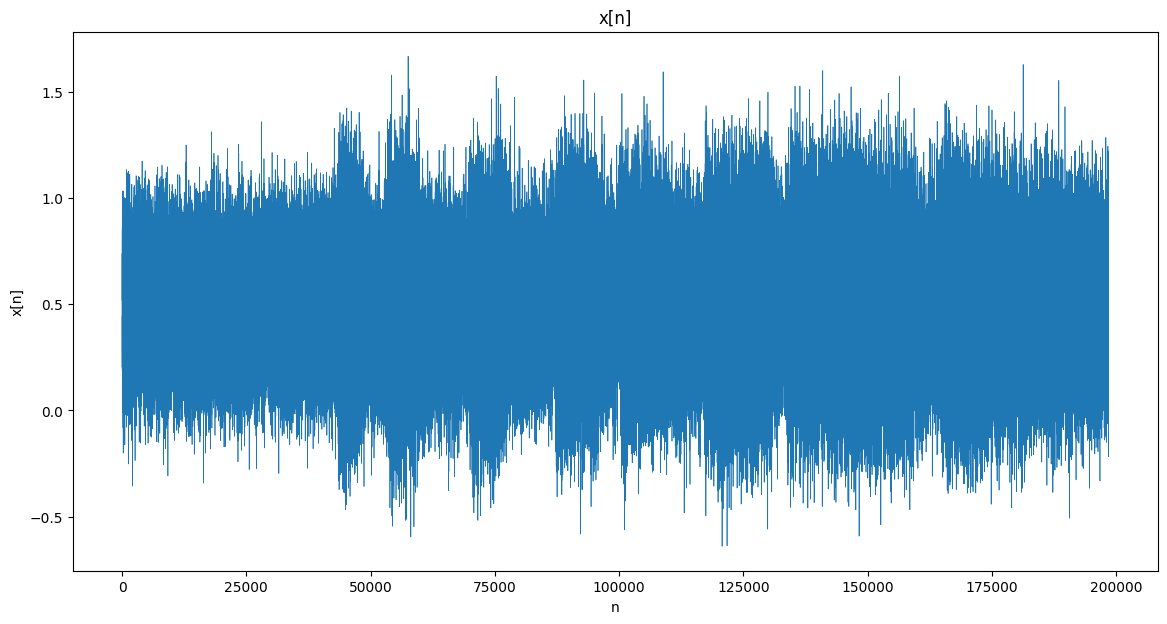

In [28]:
nn = np.linspace(0, n_samples-1, n_samples).astype(int)

plt.figure(figsize=(14,7))
plt.title("x[n]")
plt.xlabel("n")
plt.ylabel("x[n]")
plt.plot(nn, x, linewidth=0.5)

This is the signal with the added noise. **CAREFUL, AUTOPLAY IS ON**

In [36]:
# This normalizes the signal before writing the file, but it still doesn't work correctly
m = np.max(np.abs(x))
xf32 = (x/m).astype(np.float32)
sp.io.wavfile.write('/content/drive/MyDrive/10 - UB /30 - 2nd semester courses/10 - Applied Harmonic Analysis/Labs/Lab2/noisy.wav', samplerate, xf32)

# wavfile.write('/content/drive/MyDrive/10 - UB /30 - 2nd semester courses/10 - Applied Harmonic Analysis/Labs/Lab2/noisy.wav', samplerate, y)

Audio('/content/drive/MyDrive/10 - UB /30 - 2nd semester courses/10 - Applied Harmonic Analysis/Labs/Lab2/noisy.wav', autoplay=True)

In order to achieve the most optimal audio approximation, some experimentation is needed. The parameters defined in the following are the best ones that have been obtained through testing in the performed experiments

In [30]:
# Parameters definition
r = 0.05 # Preservation ratio
wa = 'db6' # Analysis filters
ws = 'db6' # Analysis filters
J = 5 # No. of levels

In [31]:
# Compute the fwt of the original audio
c_fwt = pywt.swt(x_padded, wavelet=wa, level=J, trim_approx=True)

In [33]:
# Remove the small coefficients in the wavelet space
# Compute the fwt of the original audio
c_fwt = pywt.swt(x, wavelet=wa, level=J, trim_approx=True)
cc_fwt = pywt.threshold(c_fwt, r * np.max(c_fwt), mode='greater') # Keep the largest

In [34]:
# Obtain once again the audio
r_fwt = pywt.iswt(cc_fwt, wavelet=ws)

This is the filtered signal

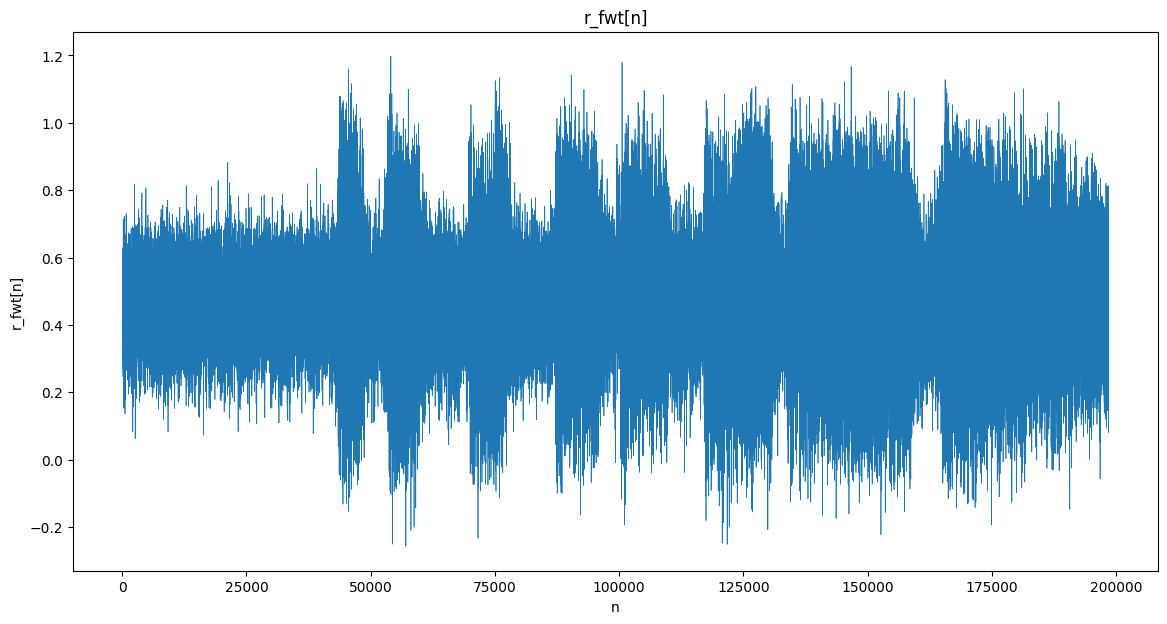

In [37]:
nn = np.linspace(0, n_samples-1, n_samples).astype(int)

plt.figure(figsize=(14,7))
plt.title("r_fwt[n]")
plt.xlabel("n")
plt.ylabel("r_fwt[n]")
plt.plot(nn, r_fwt, linewidth=0.5)

Finally, we can play the audio file to hear how the noise has been slightly reduced. **CAREFUL, AUTOPLAY IS ON**

In [35]:
# This normalizes the signal before writing the file, but it still doesn't work correctly
m = np.max(np.abs(r_fwt))
yf32 = (r_fwt/m).astype(np.float32)
sp.io.wavfile.write('/content/drive/MyDrive/10 - UB /30 - 2nd semester courses/10 - Applied Harmonic Analysis/Labs/Lab2/noisy.wav', samplerate, yf32)

# wavfile.write('/content/drive/MyDrive/10 - UB /30 - 2nd semester courses/10 - Applied Harmonic Analysis/Labs/Lab2/noisy.wav', samplerate, r_fwt)

Audio('/content/drive/MyDrive/10 - UB /30 - 2nd semester courses/10 - Applied Harmonic Analysis/Labs/Lab2/noisy.wav', autoplay=True)